In [12]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

优点：

1. 逻辑回归对线性关系的拟合效果好到丧心病狂
2. 逻辑回归计算快
3. 逻辑回归返回的分类结果不是固定的0，1，而是以小数形式呈现的类概率数字：

逻辑回归的本质，它是一个返回对数几率的，在线性数据上表现优异的分类器，其数学目的是求解能够让模型对数据拟合程度最高的参数 的值，以此构建预测函数 ，然后将 特征矩阵输入预测函数来计算出逻辑回归的结果y。

对逻辑回归中过拟合的控制，通过正则化来实现。

In [9]:
# 正则化

# penalty - L1\L2
# L1正则化本质是一个特征选择的过程，掌管了参数的“稀疏性”
# L1正则化越强，参数向量中就越多的参数为0，参数就越稀疏，选出来的特征就越少
# 如果 特征量很大，数据维度很高，我们会倾向于使用L1正则化。

# L2正则化在加强的过程中，会尽量让每个特征对模型都有一些小的贡献，
# 但携带信息少，对模型贡献不大的特征的参数会非常接近于0。


# C 默认为1，值越小惩罚越重，正则化强度逐渐增大（即C逐渐变小）
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
data = load_breast_cancer()
X = data.data# 569.30
y = data.target

lrl1 = LR(penalty='l1',solver='liblinear',C=0.5,max_iter=1000)
lrl2 = LR(penalty='l2',solver='liblinear',C=0.5,max_iter=1000)

lrl1 = lrl1.fit(X,y)
lrl1.coef_
(lrl1.coef_ != 0).sum(axis=1)

lrl2 = lrl2.fit(X,y)
lrl2.coef_

array([[ 4.02140155,  0.03232138, -0.13999997, -0.01624323,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.5067087 ,  0.        , -0.07131566,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.24636343, -0.12886587, -0.01439087,  0.        ,
         0.        , -2.01948031,  0.        ,  0.        ,  0.        ]])

array([10])

array([[ 1.61331113e+00,  1.00124605e-01,  4.60084834e-02,
        -4.19839432e-03, -9.26228937e-02, -3.00484301e-01,
        -4.53250190e-01, -2.19778015e-01, -1.33074668e-01,
        -1.92576286e-02,  1.89635811e-02,  8.74998561e-01,
         1.32421950e-01, -9.53784314e-02, -9.62972408e-03,
        -2.53596204e-02, -5.83890299e-02, -2.67755115e-02,
        -2.73846616e-02, -8.05302929e-05,  1.28529688e+00,
        -3.00088054e-01, -1.74310770e-01, -2.23545072e-02,
        -1.70267493e-01, -8.77272211e-01, -1.15830085e+00,
        -4.22526360e-01, -4.12406225e-01, -8.66393364e-02]])

<Figure size 432x432 with 0 Axes>

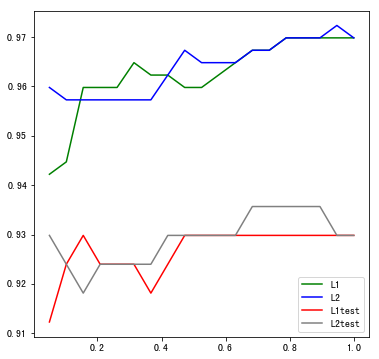

In [25]:
#模型评价
l1 = []
l2 = []
l1test = []
l2test = []

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)
for i in np.linspace(0.05,1,19):
    lrl1 = LR(penalty='l1',solver='liblinear',C=i,max_iter=1000)
    lrl2 = LR(penalty='l2',solver='liblinear',C=i,max_iter=1000)
    
    lrl1 = lrl1.fit(Xtrain,ytrain)
    l1.append(accuracy_score(lrl1.predict(Xtrain),ytrain))
    l1test.append(accuracy_score(lrl1.predict(Xtest),ytest))
    
    lrl2 = lrl2.fit(Xtrain,ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),ytest))

graph = [l1,l2,l1test,l2test]
color = ['g','b','r','gray']
label = ["L1","L2","L1test","L2test"]

plt.figure(figsize=(6,6))
for i in range(len(graph)):
    plt.plot(np.linspace(0.05,1,19),graph[i],color[i],label=label[i])
plt.legend(loc=4)
plt.show()

In [3]:
# 特征工程
# 嵌入法 embedded

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel

data = load_breast_cancer()
X = data.data # 569.30
y = data.target

In [27]:
lr_embd = LR(solver='liblinear',C=0.9,random_state=420)
cross_val_score(lr_embd,X,y,cv=10).mean()

0.9508998790078644

In [28]:
X_embd = SelectFromModel(lr_embd,norm_order=1).fit_transform(data.data,data.target)
#X_embd.shape#(569, 9)
cross_val_score(lr_embd,X_embd,y,cv=10).mean()

0.9368323826808401

0.9563164376458386 6.01


<Figure size 1440x360 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fc1cbf5a390>,
 <a list of 20 Text xticklabel objects>)

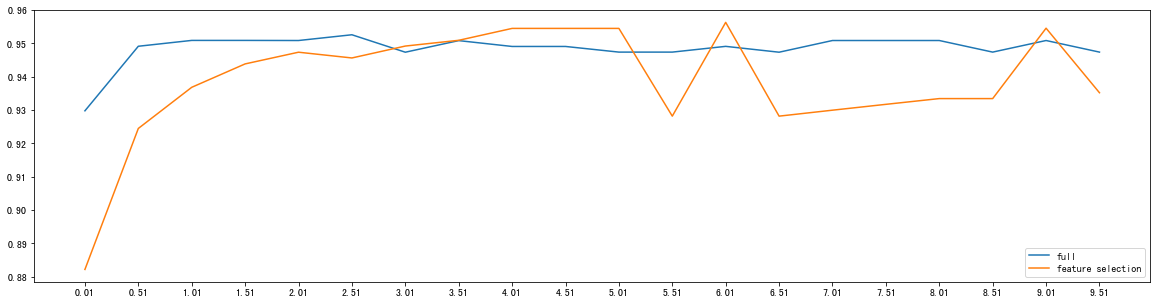

In [38]:
fullx = [] 
fsx = []
 
C=np.arange(0.01,10.01,0.5)
 
for i in C:
    LR_ = LR(solver="liblinear",C=i,random_state=420)
    fullx.append(cross_val_score(LR_,data.data,data.target,cv=10).mean())
    X_embedded = SelectFromModel(LR_,norm_order=1).fit_transform(data.data,data.target)
    fsx.append(cross_val_score(LR_,X_embedded,data.target,cv=10).mean())
print(max(fsx),C[fsx.index(max(fsx))])
 
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

0.9580405755768732 5.8449999999999935


<Figure size 1440x360 with 0 Axes>

([<matplotlib.axis.XTick at 0x7fc1c9898be0>,
 <a list of 200 Text xticklabel objects>)

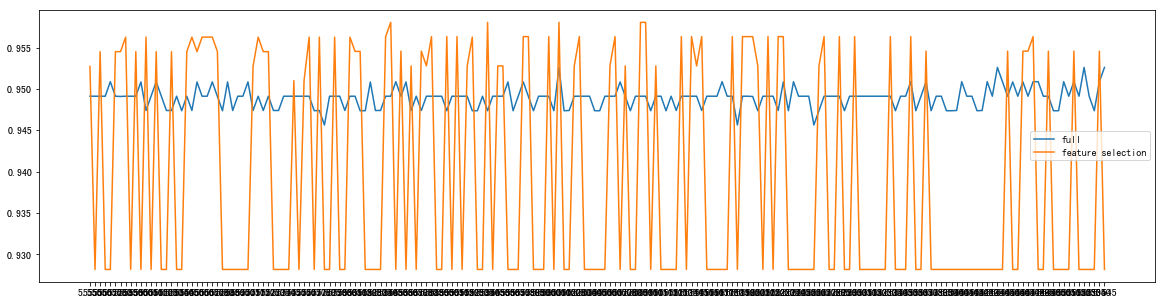

In [45]:
fullx = []
fsx = []
C = np.arange(5.55,6.55,0.005)

for i in c:
    lr = LR(solver='liblinear',C=i,random_state=420)
    fullx.append(cross_val_score(lr,X,y,cv=10).mean())
    X_embd = SelectFromModel(lr,norm_order=1).fit_transform(X,y)
    fsx.append(cross_val_score(lr,X_embd,y,cv=10).mean())
    
print(max(fsx),C[fsx.index(max(fsx))])# C=5.845
plt.figure(figsize=(20,5))
plt.plot(C,fullx,label="full")
plt.plot(C,fsx,label="feature selection")
plt.xticks(C)
plt.legend()
plt.show()

In [46]:
lr = LR(solver='liblinear',C=5.845,random_state=420)

cross_val_score(lr,X,y,cv=10).mean()
X_embd = SelectFromModel(lr,norm_order=1).fit_transform(X,y)
cross_val_score(lr,X_embd,y,cv=10).mean()

0.9473911070780398

0.928182525278714

/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9698492462311558 0.935672514619883


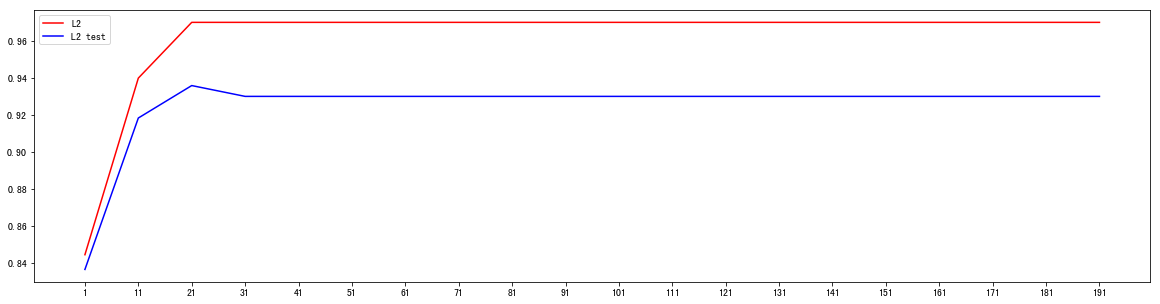

In [7]:
# 梯度下降 max_iter
# n_iter_

l2 = []
l2test = []

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=420)

for i in np.arange(1,201,10):
    lrl2 = LR(penalty='l2',solver='liblinear',C=0.9,max_iter=i)
    lrl2 = lrl2.fit(Xtrain,ytrain)
    l2.append(accuracy_score(lrl2.predict(Xtrain),ytrain))
    l2test.append(accuracy_score(lrl2.predict(Xtest),ytest))

graph = [l2,l2test]
color = ['r','b']
label = ['L2','L2 test']

plt.figure(figsize=(20,5))
for i in range(len(graph)):
    plt.plot(np.arange(1,201,10),graph[i],color[i],label=label[i])
plt.legend()
plt.xticks(np.arange(1,201,10))

print(max(l2),max(l2test))

In [8]:
lr = LR(penalty='l2',solver='liblinear',C=0.9,max_iter=300).fit(Xtrain,ytrain)
lr.n_iter_

array([24], dtype=int32)

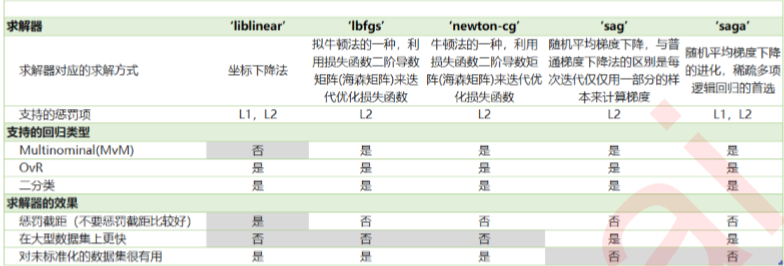

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
iris = load_iris()
for i in ('multinomial','ovr'):
    clf = LogisticRegression(solver='lbfgs',max_iter=100,random_state=42,
                            multi_class=i).fit(iris.data,iris.target)
    clf.n_iter_
    print("training score: %.3f(%s)" %(clf.score(iris.data,iris.target),i))

#training score: 0.987(multinomial)
#training score: 0.960(ovr)
# sag未收敛

/jxy8/jxy/.local/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


array([100], dtype=int32)

training score: 0.973(multinomial)


array([29, 28, 28], dtype=int32)

training score: 0.953(ovr)
